# SMA Statergy
We determine the 12-period simple moving average (referred to as 'SMA12') and compare it with the price at that time. We (subjectively) select 12 since SMA12 would be the average price over one hour.

There are two conditions which we check.

    If the price is greater than the SMA12, we go long. We continue to stay invested until the square-off condition is satisfied.

    When the price becomes less than the SMA12, we square off our long position.

Our trading rules can be stated as

    Buy when price > SMA12
    Square off when price < SMA12

In [1]:
import os
dir(os)
os.getcwd()

'C:\\Users\\naray\\Python Programs\\DMP01-Inclass-Exercises-File'

In [2]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [3]:
end1 = datetime.date.today()

In [4]:
start1 =end1=pd.Timedelta(days=50)

In [5]:
# To use interactive plotting we can also use cufflinks

import cufflinks as cf

# To enable offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline


end1 = datetime.date.today()
start1 = end1 - pd.Timedelta(days=50)

df = yf.download("^NSEI", start=start1, end=end1, interval="5m" )
print(type(df))
print(df.shape)
print(df.head())
print(df.tail())

# Run the below lines to load the data used in backtesting the strategy 


df = pd.read_csv("DMP_01_data_NSE_5min_interval.csv", index_col=0, parse_dates=True)
print(type(df))
print(df.shape)
print(df.head())
print(df.tail())

df1a = df.copy()

###########################

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
(2625, 6)
                                   Open          High           Low  \
Datetime                                                              
2024-07-23 09:15:00+05:30  24564.550781  24580.949219  24544.150391   
2024-07-23 09:20:00+05:30  24547.550781  24556.000000  24521.900391   
2024-07-23 09:25:00+05:30  24508.150391  24532.199219  24503.199219   
2024-07-23 09:30:00+05:30  24531.650391  24542.449219  24510.250000   
2024-07-23 09:35:00+05:30  24516.250000  24531.949219  24507.000000   

                                  Close     Adj Close  Volume  
Datetime                                                       
2024-07-23 09:15:00+05:30  24547.750000  24547.750000       0  
2024-07-23 09:20:00+05:30  24523.000000  24523.000000       0  
2024-07-23 09:25:00+05:30  24532.199219  24532.199219       0  
2024-07-23 09:30:00+05:30  24516.449219  24516.449219       0  
2024-07-23 09:35:00+05:30  24518.050781  24518.050781       0  
      

                                  Open        Close    Adj Close  cc_returns  \
Datetime                                                                       
2020-03-26 09:15:00+05:30  8451.000000  8339.349609  8339.349609         NaN   
2020-03-26 09:20:00+05:30  8336.400391  8396.650391  8396.650391    0.006871   
2020-03-26 09:25:00+05:30  8396.849609  8476.599609  8476.599609    0.009522   
2020-03-26 09:30:00+05:30  8476.900391  8488.400391  8488.400391    0.001392   
2020-03-26 09:35:00+05:30  8490.099609  8487.500000  8487.500000   -0.000106   

                           sma  
Datetime                        
2020-03-26 09:15:00+05:30  NaN  
2020-03-26 09:20:00+05:30  NaN  
2020-03-26 09:25:00+05:30  NaN  
2020-03-26 09:30:00+05:30  NaN  
2020-03-26 09:35:00+05:30  NaN  
                                  Open        Close    Adj Close  cc_returns  \
Datetime                                                                       
2020-05-14 15:05:00+05:30  9152.250000  9149.400

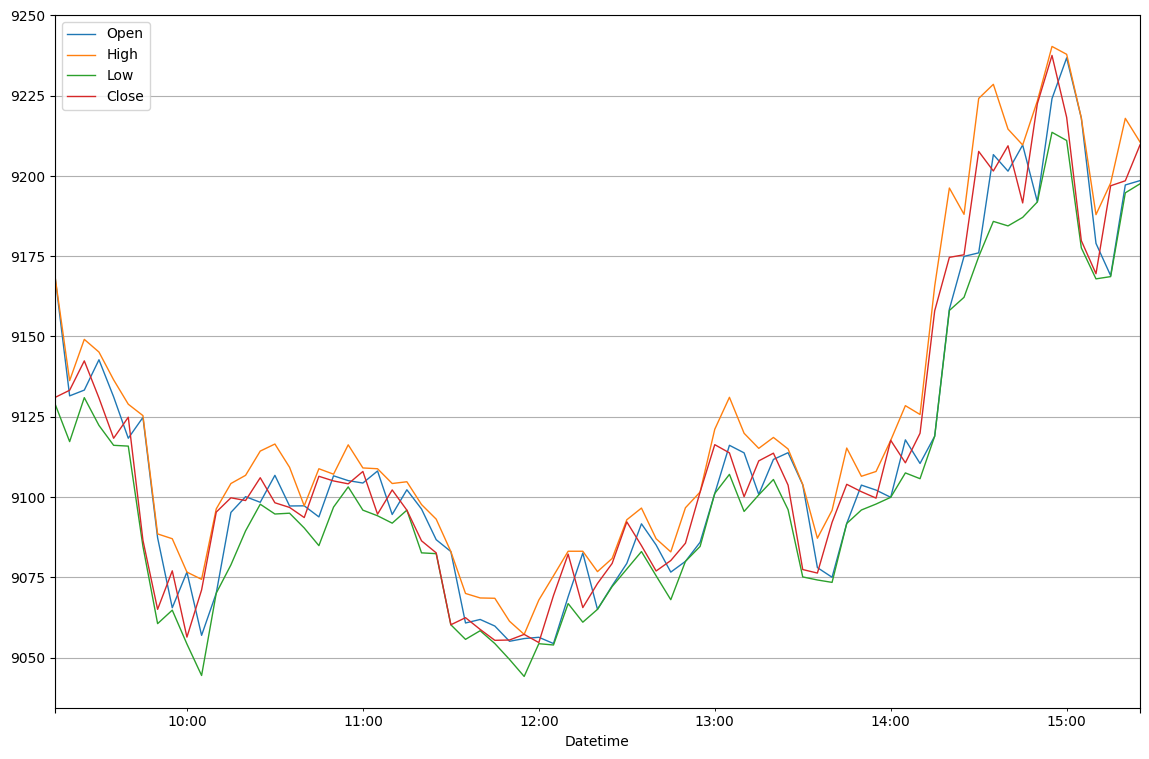

In [6]:

df1a.loc['12 May 2020', ['Open', 'High', 'Low', 'Close']].plot(grid=True, linewidth=1, figsize=(14, 9))
df1a.drop(columns=['High', 'Low', 'Volume'], inplace=True)
df1a['cc_returns'] = df1a['Close'].pct_change()
sma = 12
df1a['sma'] = df1a['Close'].rolling(window=sma).mean()
print(df1a.head())
print(df1a.tail())
df1a['position'] = np.where((df1a['Close'] > df1a['sma']), 1, 0)
df1a['position'] = df1a['position'].shift(1)

df1a['position'].value_counts()
print(df1a.head())
print(df1a.tail())

                                  Open        Close    Adj Close  cc_returns  \
Datetime                                                                       
2020-03-26 09:15:00+05:30  8451.000000  8339.349609  8339.349609         NaN   
2020-03-26 09:20:00+05:30  8336.400391  8396.650391  8396.650391    1.006871   
2020-03-26 09:25:00+05:30  8396.849609  8476.599609  8476.599609    1.009522   
2020-03-26 09:30:00+05:30  8476.900391  8488.400391  8488.400391    1.001392   
2020-03-26 09:35:00+05:30  8490.099609  8487.500000  8487.500000    0.999894   

                           sma  position  strategy_returns  
Datetime                                                    
2020-03-26 09:15:00+05:30  NaN       NaN               NaN  
2020-03-26 09:20:00+05:30  NaN       0.0               1.0  
2020-03-26 09:25:00+05:30  NaN       0.0               1.0  
2020-03-26 09:30:00+05:30  NaN       0.0               1.0  
2020-03-26 09:35:00+05:30  NaN       0.0               1.0  
            

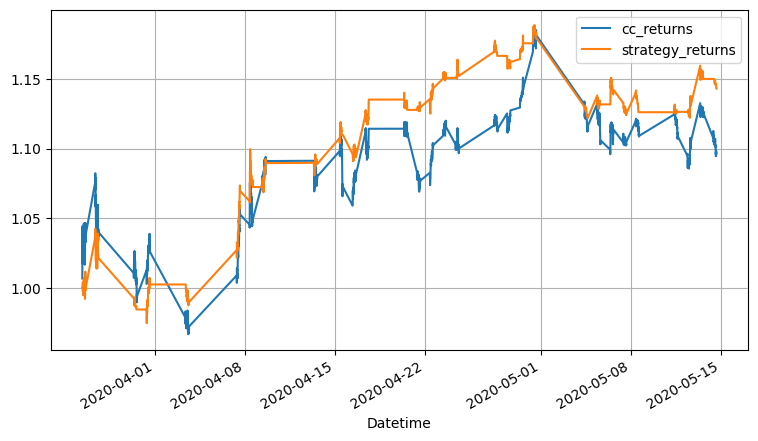

In [7]:
df1a['strategy_returns'] = df1a['cc_returns'] * df1a['position']


df1a['strategy_returns'] = 1 + df1a['strategy_returns']
df1a['cc_returns'] = 1 + df1a['cc_returns']

print(df1a.head())
print(df1a.tail())

df1a[['cc_returns', 'strategy_returns']].cumprod().plot(grid=True, figsize=(9, 5))

print('Buy and hold returns: ', np.round(df1a['cc_returns'].cumprod()[-1], 2))
print('Strategy returns: ', np.round(df1a['strategy_returns'].cumprod()[-1], 2))